# Boston Housing Price Prediction

### Load needed files

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
print("Type of boston dataset:", type(boston))

Type of boston dataset: <class 'sklearn.utils.Bunch'>


In [4]:
# A Bunch is you remember is a dictionary based dataset.
# Dictionaries are addressed by keys.
# Look for the keys.
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
# DESCR sounds like it could be useful. Let's print the description.
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# Chaging the data to a pandas dataframe
import pandas as pd
boston_df = pd.DataFrame(boston['data'])
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# Adding the column names
boston_df.columns = boston["feature_names"]
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# Add the target as PRICE
boston_df["PRICE"] = boston["target"]
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# Check is there nan data in boston_df
import numpy as np
print(np.sum(np.isnan(boston_df)))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


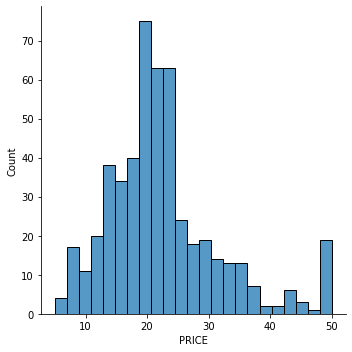

In [10]:
# What type of data are there?
import seaborn as sns
sns.displot(boston_df['PRICE'])

# Quickly look at other data
# Look at the bottom row to see thinks likely corelated with price
# Look along the diagonal to see historamgs of each.
 ##sns.pairplot(boston_df)

### Preparing the model
- It is common to separate 'y' as the dependent variable and 'X' as the matrix of independent variables
- Here we are using 'train_test_split' to split the test and train
- This creates 4 subsets, with IV and DV separated: X_train, X_test, y_train, y_test

In [12]:
# This will throw and error at import if haven't upgraded
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [13]:
# y is the dependent variable 
y = boston_df["PRICE"]

# As we know, iloc is used to slice the array by index number. Here this is the 
# matrix of independent variables
X = boston_df.iloc[:,0:13]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


### Set num_epoch, number of traning iteration

In [102]:
# Define training hyperparameters
# Maybe this part can be my objective variables!!

batch_size = 50
num_epochs = 1000
learning_rate = 0.01
size_hidden = 100

# Calculate some other hyperparameters based on data
batch_no = len(X_train) // batch_size
cols=X_train.shape[1] # Number of columns in input matrix
n_output= 1

### Creating the Neural Network model

In [103]:
#Create the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print("Executing the model on :",device)
class Net(torch.nn.Module):
    def __init__(self, n_feature, size_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(cols, size_hidden)   # hidden layer
        self.predict = torch.nn.Linear(size_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x
net = Net(cols, size_hidden, n_output)

Executing the model on : cuda:0


### Set Learning rate 

In [104]:
# Adam is a specific flavor of gradient descent which is typically better
optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate)
# optimizer = torch.optim.SGD(net.parameters(), lr=0.2)

criterion = torch.nn.MSELoss(size_average=False) # this is for regression mean squared loss

C:\Users\user\Anaconda3\envs\cifar_10\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [48]:
# Change to numpy array
X_train = X_train.values
X_test  = X_test.values
y_train = y_train.values
y_test  = y_test.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

### Training the model

In [105]:
from sklearn.utils import shuffle
from torch.autograd import Variable
running_loss = 0.0
for epoch in range(num_epochs):
    #Shuffle just mixes up the dataset between epocs
    X_train, y_train = shuffle(X_train, y_train)
    # Mini batch learning
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        inputs = Variable(torch.FloatTensor(X_train[start:end]))
        labels = Variable(torch.FloatTensor(y_train[start:end]))
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        #print("outputs",outputs)
        #print("outputs",outputs,outputs.shape,"labels",labels, labels.shape)
        loss = criterion(outputs, torch.unsqueeze(labels,dim=1))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
    running_loss = 0.0

Epoch 1 loss:  233489.59228515625
Epoch 2 loss:  91201.15795898438
Epoch 3 loss:  51163.484375
Epoch 4 loss:  32629.489379882812
Epoch 5 loss:  27432.478271484375
Epoch 6 loss:  22185.632568359375
Epoch 7 loss:  20252.886840820312
Epoch 8 loss:  19876.100952148438
Epoch 9 loss:  19502.789794921875
Epoch 10 loss:  18529.303344726562
Epoch 11 loss:  17998.509643554688
Epoch 12 loss:  17548.983642578125
Epoch 13 loss:  17143.180053710938
Epoch 14 loss:  16688.06201171875
Epoch 15 loss:  16338.894653320312
Epoch 16 loss:  16825.030883789062
Epoch 17 loss:  15885.068359375
Epoch 18 loss:  13995.442993164062
Epoch 19 loss:  13660.498413085938
Epoch 20 loss:  12944.260009765625
Epoch 21 loss:  13095.244506835938
Epoch 22 loss:  12390.847778320312
Epoch 23 loss:  11208.975341796875
Epoch 24 loss:  11157.398315429688
Epoch 25 loss:  10832.586181640625
Epoch 26 loss:  11325.184448242188
Epoch 27 loss:  10671.846557617188
Epoch 28 loss:  11132.914489746094
Epoch 29 loss:  10953.366333007812
Epoch

Epoch 257 loss:  4656.9197998046875
Epoch 258 loss:  4819.263275146484
Epoch 259 loss:  3695.7223205566406
Epoch 260 loss:  3843.4321899414062
Epoch 261 loss:  3770.356964111328
Epoch 262 loss:  3593.1582641601562
Epoch 263 loss:  3530.106475830078
Epoch 264 loss:  3599.4909057617188
Epoch 265 loss:  4523.389099121094
Epoch 266 loss:  4210.368835449219
Epoch 267 loss:  3318.4452514648438
Epoch 268 loss:  3799.052276611328
Epoch 269 loss:  3549.760772705078
Epoch 270 loss:  3756.052032470703
Epoch 271 loss:  4997.689117431641
Epoch 272 loss:  5281.909759521484
Epoch 273 loss:  4691.9520263671875
Epoch 274 loss:  4342.763671875
Epoch 275 loss:  5111.912689208984
Epoch 276 loss:  3930.1324157714844
Epoch 277 loss:  3612.891876220703
Epoch 278 loss:  3966.118438720703
Epoch 279 loss:  4914.76953125
Epoch 280 loss:  4086.4010009765625
Epoch 281 loss:  3879.8812561035156
Epoch 282 loss:  3999.013427734375
Epoch 283 loss:  4004.683624267578
Epoch 284 loss:  3645.602569580078
Epoch 285 loss:  

Epoch 504 loss:  2572.0882110595703
Epoch 505 loss:  2642.694869995117
Epoch 506 loss:  2990.1072387695312
Epoch 507 loss:  3216.0728759765625
Epoch 508 loss:  2829.6087646484375
Epoch 509 loss:  2546.100814819336
Epoch 510 loss:  2703.2000732421875
Epoch 511 loss:  3650.6533813476562
Epoch 512 loss:  3257.387420654297
Epoch 513 loss:  2904.39794921875
Epoch 514 loss:  3810.897979736328
Epoch 515 loss:  2894.3529663085938
Epoch 516 loss:  2605.3555908203125
Epoch 517 loss:  3968.62841796875
Epoch 518 loss:  3212.5328063964844
Epoch 519 loss:  2970.9478759765625
Epoch 520 loss:  2919.059585571289
Epoch 521 loss:  2804.5491638183594
Epoch 522 loss:  2781.042953491211
Epoch 523 loss:  2624.537078857422
Epoch 524 loss:  2674.5653076171875
Epoch 525 loss:  2401.54736328125
Epoch 526 loss:  3033.8102416992188
Epoch 527 loss:  2994.4113006591797
Epoch 528 loss:  3837.72412109375
Epoch 529 loss:  4834.427688598633
Epoch 530 loss:  4287.0494384765625
Epoch 531 loss:  3581.269073486328
Epoch 532

Epoch 758 loss:  2031.5947570800781
Epoch 759 loss:  2165.2622985839844
Epoch 760 loss:  2100.746078491211
Epoch 761 loss:  2092.6095581054688
Epoch 762 loss:  2100.2942810058594
Epoch 763 loss:  2118.6344451904297
Epoch 764 loss:  2048.669235229492
Epoch 765 loss:  2868.7069549560547
Epoch 766 loss:  2720.654022216797
Epoch 767 loss:  2549.527313232422
Epoch 768 loss:  2321.4495544433594
Epoch 769 loss:  2601.4579467773438
Epoch 770 loss:  1917.5104064941406
Epoch 771 loss:  2733.3521575927734
Epoch 772 loss:  2393.3468627929688
Epoch 773 loss:  2568.166702270508
Epoch 774 loss:  2748.368453979492
Epoch 775 loss:  2567.8573303222656
Epoch 776 loss:  3288.003860473633
Epoch 777 loss:  2377.862091064453
Epoch 778 loss:  3056.411590576172
Epoch 779 loss:  3470.130584716797
Epoch 780 loss:  2663.1437377929688
Epoch 781 loss:  2264.891403198242
Epoch 782 loss:  2224.9622497558594
Epoch 783 loss:  2079.7054901123047
Epoch 784 loss:  2329.87353515625
Epoch 785 loss:  2229.460403442383
Epoch 

In [106]:
import pandas as pd
from sklearn.metrics import r2_score
# For train prediction r2 score
X = Variable(torch.FloatTensor(X_train)) 
result = net(X)
pred=result.data[:,0].numpy()
print(len(pred),len(y_train))
r2_score(pred,y_train)

354 354


0.8657648582371176

In [107]:
X = Variable(torch.FloatTensor(X_test))
result = net(X)
pred = result.data[:,0].numpy()
print(len(pred),len(y_test))
r2_score(pred,y_test)

152 152


0.5480730265259972

In [98]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#This is a little bit tricky to get the resulting prediction.  
def calculate_r2(x,y=[]):
    """
    This function will return the r2 if passed x and y or return predictions if just passed x. 
    """
    # Evaluate the model with the test set. 
    X = Variable(torch.FloatTensor(x))  
    result = net(X) #This outputs the value for regression
    result=result.data[:,0].numpy()
  
    if len(y) != 0:
        r2=r2_score(result, y)
        print("R-Squared", r2)
        #print('Accuracy {:.2f}'.format(num_right / len(y)), "for a total of ", len(y), "records")
        return pd.DataFrame(data= {'actual': y, 'predicted': result})
    else:
        print("returning predictions")
        return result

In [99]:
def calculate_rmse(x,y=[]):
    """
    This function will return the Root Mean Squared Error if passed x and y or return predictions if just passed x
    """
    # Evaluate the model with the test set.
    X = Variable(torch.FloatTensor(x))
    result = net(X) # This outputs the value for regression
    result = result.data[:,0].numpy()
    
    if( len(y) != 0 ):
        rmse = mean_squared_error(result, y)
        print("RMSE" , rmse)
        return pd.DataFrame(data = {"actual" : y, "predicted" : result})
    else:
        print("returning Predictions")
        return result

In [81]:
def calculate_r2_rmse(x,y=[]):
    # Evaluate the model with the test set.
    X = Variable(torch.FloatTensor(x))
    result = net(X)
    result = result.data[:,0].numpy()
    
    
    rmse = mean_squared_error(result,y) ** 0.5
    r2 = r2_score(result,y)
        
    return r2, rmse

In [108]:
r2_train, rmse_train = calculate_r2_rmse(X_train, y_train)
r2_test, rmse_test = calculate_r2_rmse(X_test, y_test)

In [109]:
print("train R2 square:",r2_train)
print("test R2 square:",r2_test)
print()
print("train RMSE square:",rmse_train)
print("test RMSE square:",rmse_test)

train R2 square: 0.8657648582371176
test R2 square: 0.5480730265259972

train RMSE square: 3.1432900062136255
test RMSE square: 5.540235207161719


In [42]:
result1

,actual,predicted
0,13.1,16.454353
1,17.3,14.859107
2,41.7,32.101982
3,7.0,18.488804
4,15.4,19.649773
...,...,...
349,23.9,29.403618
350,23.3,25.662886
351,32.7,30.098028
352,20.2,26.569017


### Linear model Test

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit( X_train, y_train )


LinearRegression()

In [44]:

print('R2 for Train)', lm.score( X_train, y_train ))
print('R2 for Test (cross validation)', lm.score(X_test, y_test))

R2 for Train) 0.7645451026942549
R2 for Test (cross validation) 0.6733825506400176
